In [233]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

In [234]:
df=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [235]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [236]:
df['Sleep Disorder']=df['Sleep Disorder'].map({'Sleep Apnea':0,'Insomnia':1})

In [237]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
0.0    78
1.0    77
Name: count, dtype: int64

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    float64
dtypes: float64(2), int64(7), object(4)
memory usage: 38.1+ KB


In [239]:
df.duplicated().sum()

np.int64(0)

In [240]:
df.drop_duplicates(inplace=True)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    float64
dtypes: float64(2), int64(7), object(4)
memory usage: 38.1+ KB


In [242]:
df.drop('Person ID',axis=1,inplace=True)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    float64
dtypes: float64(2), int64(6), object(4)
memory usage: 35.2+ KB


In [244]:
print(df['Occupation'].unique())
print(df['BMI Category'].unique())
print(df['Blood Pressure'].unique())

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
['Overweight' 'Normal' 'Obese' 'Normal Weight']
['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']


In [245]:
df['Blood Pressure']

0      126/83
1      125/80
2      125/80
3      140/90
4      140/90
        ...  
369    140/95
370    140/95
371    140/95
372    140/95
373    140/95
Name: Blood Pressure, Length: 374, dtype: object

In [246]:

df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.drop('Blood Pressure',axis=1,inplace=True)
print(df.head())


  Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
2   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Representative             5.9                 4   
4   Male   28  Sales Representative             5.9                 4   

   Physical Activity Level  Stress Level BMI Category  Heart Rate  \
0                       42             6   Overweight          77   
1                       60             8       Normal          75   
2                       60             8       Normal          75   
3                       30             8        Obese          85   
4                       30             8        Obese          85   

   Daily Steps  Sleep Disorder  Systolic  Diastolic  
0         4200             NaN       126         83  
1        10000             NaN       1

In [247]:
len(df['Occupation']=='Manger')

374

In [248]:
df['Occupation'].value_counts()
df=df[df['Occupation']!='Manager']

In [249]:
df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Name: count, dtype: int64

Nulls in new df: Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Systolic                   0
Diastolic                  0
dtype: int64
-----------------------------------------
Encoded_df_check:
 Gender_Female                      0
Gender_Male                        0
Occupation_Accountant              0
Occupation_Doctor                  0
Occupation_Engineer                0
Occupation_Lawyer                  0
Occupation_Nurse                   0
Occupation_Sales Representative    0
Occupation_Salesperson             0
Occupation_Scientist               0
Occupation_Software Engineer       0
Occupation_Teacher                 0
dtype: int64
-----------------------------------------
Age                              

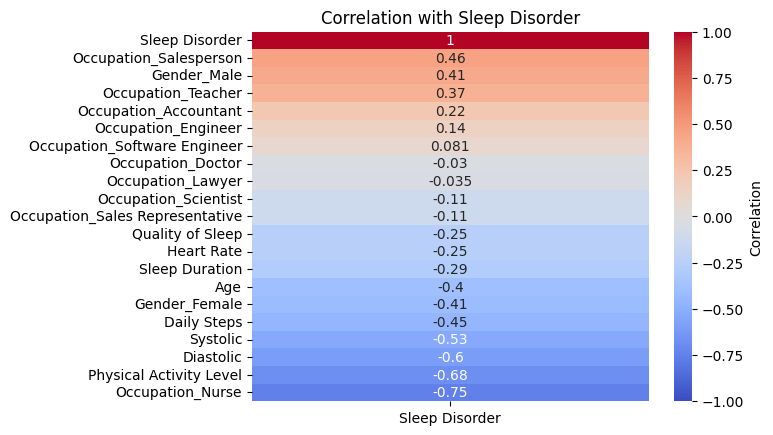

-----------------------------------------
Training score: 0.967741935483871
Testing score: 0.9032258064516129
Accuracy: 0.90
F1 Score: 0.90


In [250]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
import seaborn as sns
import matplotlib.pyplot as plt

clean_df=df.copy()
clean_df.dropna(inplace=True)
clean_df.reset_index(drop=True,inplace=True)
print("Nulls in new df:", clean_df.isna().sum())
print("-----------------------------------------")
clean_df.drop(['BMI Category','Stress Level'],axis=1,inplace=True)
cat_cols = ['Gender', 'Occupation']
# cat_cols = ['Gender', 'Occupation', 'BMI Category']
encoder = OneHotEncoder(sparse_output=False)
encoded_cats = encoder.fit_transform(clean_df[cat_cols])
feature_names = encoder.get_feature_names_out(cat_cols)
encoded_df = pd.DataFrame(encoded_cats, columns=feature_names)
print("Encoded_df_check:\n", encoded_df.isna().sum())

print("-----------------------------------------")
encoded_df.index = clean_df.index
clean_df= clean_df.drop(columns=cat_cols,axis=1)
clean_df= pd.concat([clean_df, encoded_df], axis=1)
print(clean_df.isna().sum())

print("-----------------------------------------")

corr_with_sleep_disorder = clean_df.corr()['Sleep Disorder'].sort_values(ascending=False)
sns.heatmap(corr_with_sleep_disorder.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation with Sleep Disorder')
plt.show()

print("-----------------------------------------")
X = clean_df.drop(columns=['Sleep Disorder'])  

y = clean_df['Sleep Disorder'].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2050)

model = RandomForestClassifier(random_state=2050)
model.fit(X_train, y_train)
predictions=model.predict(X_test)
print("Training score:", model.score(X_train, y_train))
print("Testing score:", model.score(X_test, y_test))
# Calculate metrics
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')



In [257]:
impute_df = df.copy()
encoded_data = encoder.transform(impute_df[['Gender', 'Occupation']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Gender', 'Occupation']))
impute_df = impute_df.drop(columns=['Gender', 'Occupation'])
impute_df = pd.concat([impute_df, encoded_df], axis=1)
# print(impute_df.info())
features=['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Heart Rate', 'Daily Steps','Systolic', 'Diastolic', 'Gender_Female',
       'Gender_Male', 'Occupation_Accountant', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher']

features_scaled=scaler.transform(impute_df[features])

predictions = model.predict(features_scaled)


impute_df["predicted_sleep_disorder"] = impute_df["Sleep Disorder"].copy()
impute_df["predicted_sleep_disorder"].fillna(pd.Series(predictions, index=impute_df.index), inplace=True)


/Users/maryamsaad/Library/CloudStorage/GoogleDrive-maryamabdallahshalash@gmail.com/My Drive/big_data/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/var/folders/c2/f9lh6rmd4q1648_pfl1636zw0000gn/T/ipykernel_19460/2219856887.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  impute_df["predicted_sleep_disorder"].fillna(pd.Series(predictions, index=impute_df.index), inplace=True)


In [258]:
impute_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 0 to 263
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              373 non-null    float64
 1   Sleep Duration                   373 non-null    float64
 2   Quality of Sleep                 373 non-null    float64
 3   Physical Activity Level          373 non-null    float64
 4   Stress Level                     373 non-null    float64
 5   BMI Category                     373 non-null    object 
 6   Heart Rate                       373 non-null    float64
 7   Daily Steps                      373 non-null    float64
 8   Sleep Disorder                   155 non-null    float64
 9   Systolic                         373 non-null    float64
 10  Diastolic                        373 non-null    float64
 11  Gender_Female                    373 non-null    float64
 12  Gender_Male                

In [259]:
impute_df.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Systolic', 'Diastolic', 'Gender_Female',
       'Gender_Male', 'Occupation_Accountant', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'predicted_sleep_disorder'],
      dtype='object')

In [261]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = impute_df.copy()
features=['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level','Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Systolic', 'Diastolic', 'Gender_Female',
       'Gender_Male', 'Occupation_Accountant', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'predicted_sleep_disorder']
df_selected = df[features].dropna()  

#
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected)


kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_selected['Cluster'] = kmeans.fit_predict(scaled_features)


# cluster_counts = df_selected['Cluster'].value_counts().to_string()

# with open("k.txt", "w") as file:
#     file.write(cluster_counts)

# print("K-Means clustering completed. Cluster counts saved in k.txt.")


In [262]:
kmeans

KMeans(n_clusters=3, n_init=10, random_state=42)